<a href="https://colab.research.google.com/github/vpolkampally0125/aaru/blob/main/Positive_Unlabled_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import util as util

from linear_model import LinearModel


In [4]:
x_train, y_train = util.load_dataset('data/ds3_train.csv', add_intercept=True)
_, t_train = util.load_dataset('data/ds3_train.csv', label_col='t')
x_valid, y_valid = util.load_dataset('data/ds3_valid.csv', add_intercept=True)
_, t_valid = util.load_dataset('data/ds3_valid.csv', label_col='t')
x_test, y_test = util.load_dataset('data/ds3_test.csv', add_intercept=True)
_, t_test = util.load_dataset('data/ds3_test.csv', label_col='t')

In [5]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        def h(theta, x):
            """Vectorized implementation of h_theta(x) = 1 / (1 + exp(-theta^T x)).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The hypothesis for all training examples. Shape (m,).
            """
            return 1 / (1 + np.exp(-np.dot(x, theta)))

        def gradient(theta, x, y):
            """Vectorized implementation of the gradient of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :param y:     All labels of shape (m,).
            :return:      The gradient of shape (n,).
            """
            m, _ = x.shape
            return -1 / m * np.dot(x.T, (y - h(theta, x)))

        def hessian(theta, x):
            """Vectorized implementation of the Hessian of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The Hessian of shape (n, n).
            """
            m, _ = x.shape
            h_theta_x = np.reshape(h(theta, x), (-1, 1))
            return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)

        def next_theta(theta, x, y):
            """The next theta updated by Newton's Method.

            :param theta: Shape (n,).
            :return:      The updated theta of shape (n,).
            """
            return theta - np.dot(np.linalg.inv(hessian(theta, x)), gradient(theta, x, y))

        m, n = x.shape

        # Initialize theta
        if self.theta is None:
            self.theta = np.zeros(n)

        # Update theta using Newton's Method
        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

        self.theta = new_theta

    def predict(self, x):
        """Make a prediction given new inputs x.

        :param x: Inputs of shape (m, n).
        :return:  Outputs of shape (m,).
        """

        return x @ self.theta >= 0

In [6]:
log_reg = LogisticRegression()
log_reg.fit(x_train, t_train)

Theta is:  [-0.9711418   2.73208784  1.07403478]
The accuracy on training set is:  0.9632


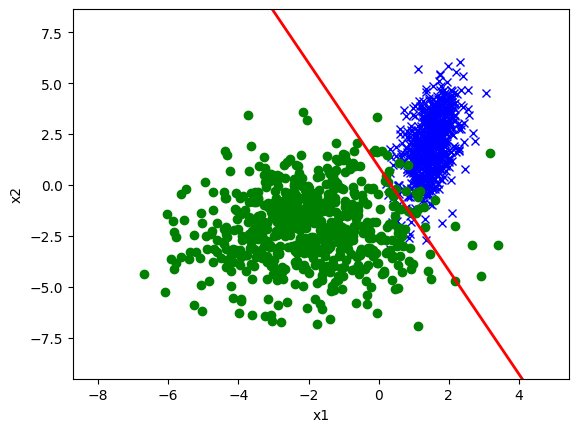

In [7]:
util.plot(x_train, t_train, log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(t_train == log_reg.predict(x_train)))

Theta is:  [-0.9711418   2.73208784  1.07403478]
The accuracy on test set is:  0.9838709677419355


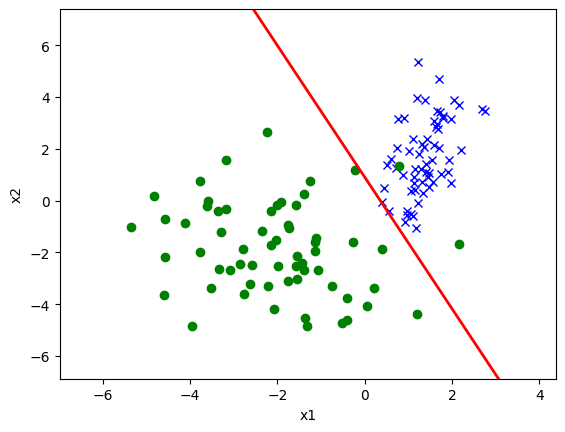

In [8]:
util.plot(x_test, t_test, log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on test set is: ", np.mean(t_test == log_reg.predict(x_test)))

In [9]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

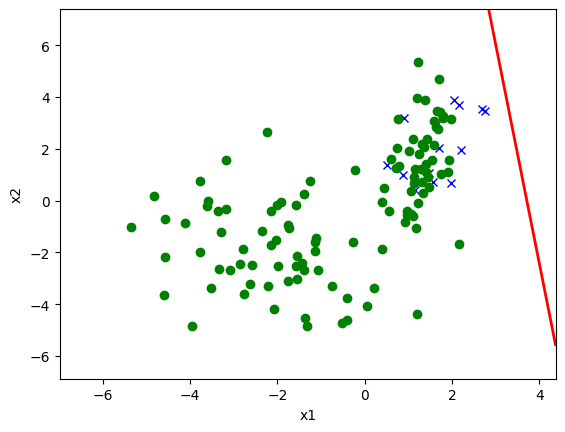

In [10]:
util.plot(x_test, y_test, log_reg.theta)

In [11]:
def h(theta, x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

In [12]:
v_plus = x_valid[y_valid == 1]
alpha = h(log_reg.theta, v_plus).mean()

In [13]:
def predict(theta, x):
    return h(theta, x) / alpha >= 0.5

In [14]:
theta_prime = log_reg.theta + np.log(2 / alpha - 1) * np.array([1, 0, 0])

Theta_prime is:  [-0.55096984  0.78596651  0.09282768]
The accuracy on test set is:  0.9516129032258065


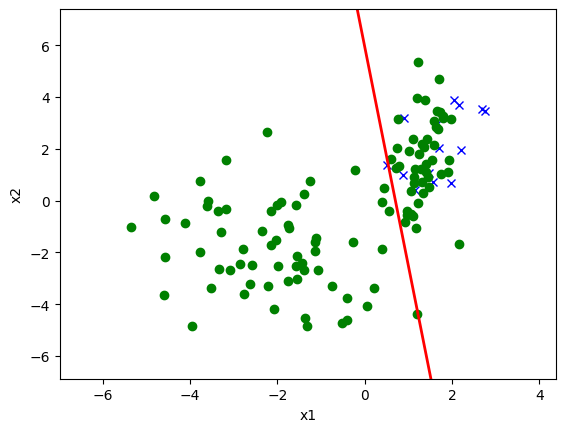

In [15]:
util.plot(x_test, y_test, theta_prime)
print("Theta_prime is: ", theta_prime)
print("The accuracy on test set is: ", np.mean(predict(log_reg.theta, x_test) == t_test))